## ROC Curve and AuC

In [1]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import diabetes dataset from sklearn

from sklearn.datasets import load_iris

dataset = load_iris()

In [3]:
#print description of the dataset

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
#get features and labels
features = dataset.data
labels = dataset.target

In [5]:
# Binarize the output (one-hot encoding)
from sklearn.preprocessing import label_binarize

labels = label_binarize(labels, classes=[0, 1, 2])
n_classes = labels.shape[1]

In [6]:
# Add noisy features to make the problem harder
import numpy as np

random_state = np.random.RandomState(0)
n_samples, n_features = features.shape
features = np.c_[features, random_state.randn(n_samples,  10 * n_features)]

In [7]:
#apply train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.5, shuffle = True)

In [8]:
#use Support Vector Machines for classification

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [9]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

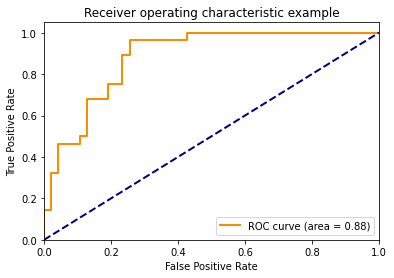

In [10]:
#plot ROC Curve and print AuC

import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()